<a href="https://colab.research.google.com/github/miczkejedrzej/MNLP-project-1/blob/main/Data_collection_Nb_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade wikidata
!pip install certifi --upgrade



In [2]:
# Import of the training data


from google.colab import files
uploaded = files.upload()

Saving [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv to [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv


In [3]:
# Import of moduls

!pip install wikidata --quiet
import requests
import certifi
import json
import matplotlib.pyplot as plt
import pandas as pd
from wikidata.client import Client
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Loading the data
train_df = pd.read_csv('[MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv', sep='\t')
train_df.head(5)

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,cultural exclusive
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,cultural representative
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,cultural representative
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,cultural representative
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,cultural representative


In [5]:
def extract_entity_id(url):
  """
  Function that extract the identity of an item, thanks to its wikidata link page

  Parameters :
  url : string
    The url from the wikidata page

  """
  return url.strip().split("/")[-1]



def get_nb_lang(wikidata_url):

  """
  Function that computes the number of languages in wich the item is defined

  Arguments:
  wikidata_url: str
    The wikidata url of the word
  """

  # Extract the id of the item
  entity_id = extract_entity_id(wikidata_url)

  #Extract informations of the item
  client = Client()
  try:
    item = client.get(entity_id, load=True)
    labels = item.data.get("labels", {})
    return len(labels.keys())
  except:
    return None


  # Extract the labels of the item


  # Return the number of labels (ie languages) of the item





# def get_nb_lang(wikidata_url):
#   """
#   Function that computes the number of languages in wich the item is defined

#   Arguments:
#   wikidata_url: str
#     The wikidata url of the word
#   """

#   # Extract the id of the item
#   entity_id = extract_entity_id(wikidata_url)

#   #Extract informations of the item
#   url = f'https://www.wikidata.org/wiki/Special:EntityData/{entity_id}.json'
#   # use request for data fetching
#   response = requests.get(url, verify=certifi.where())
#   response.raise_for_status()
#   # load the data
#   data = json.loads(response.content)


#   # Extract the labels of the item
#   labels = data.get("entities", {}).get(entity_id, {}).get("labels", {})

#   # Return the number of labels (ie languages) of the item
#   return len(labels.keys())


# Test on a simple data
# get_nb_lang(train_df.iloc[2,0])

In [6]:
def add_language_info(df):
    #item_col_index = df.columns.get_loc("item")
    #df.iloc[:,"nb_lang"] = df.iloc[:, 'item'].apply(lambda x: get_nb_lang(x))
    print(df.columns)
    df["nb_lang"] = df.apply(lambda x: get_nb_lang(x['item']),axis=1)
    return df

In [7]:
# Application to a part of the dataset
# train_df.loc[:5, "nb_lang"] = train_df.iloc[:6]["item"].apply(lambda x: get_nb_lang(x))

train_check = train_df
print(train_check.shape)
df_lang = add_language_info(train_check)
df_lang


# To apply it to the whole dataframe:
# train_df["nb_lang"] = train_df["item"].apply(lambda x: get_nb_lang(x))

(6251, 7)
Index(['item', 'name', 'description', 'type', 'category', 'subcategory',
       'label'],
      dtype='object')


,item,name,description,type,category,subcategory,label,nb_lang
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,cultural exclusive,126
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,cultural representative,72
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,cultural representative,83
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,cultural representative,42
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,cultural representative,174
...,...,...,...,...,...,...,...,...
6246,http://www.wikidata.org/entity/Q321103,Bühl,"quarter of Tübingen, Baden-Württemberg, Germany",entity,geography,neighborhood,cultural exclusive,73
6247,http://www.wikidata.org/entity/Q338167,Tenderloin,area of New York City during the late 19th and...,entity,geography,neighborhood,cultural exclusive,9
6248,http://www.wikidata.org/entity/Q66991,Schinznach-Dorf,former municipality and current district of Sc...,entity,geography,neighborhood,cultural exclusive,30
6249,http://www.wikidata.org/entity/Q66922,Ependes,village and former municipality in Bois-d'Amon...,entity,geography,neighborhood,cultural exclusive,82


['cultural representative', 'cultural exclusive', 'cultural agnostic']


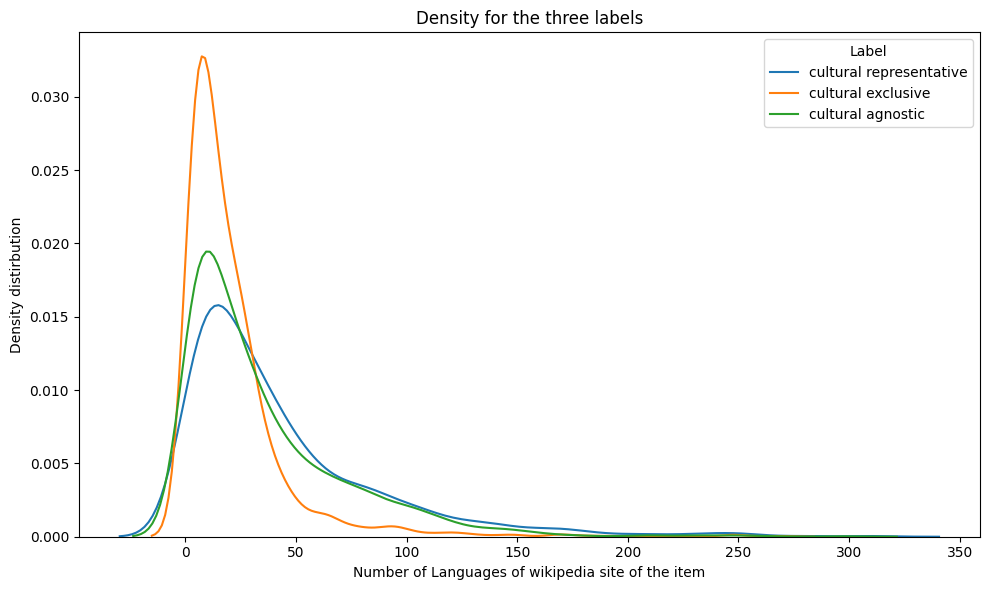

In [21]:
# plotting of the languages
import seaborn as sns
df_lang['nb_lang'] = pd.to_numeric(df_lang['nb_lang'], errors='coerce')
#categories = list(set(df_lang['label']))
categories = ['cultural representative','cultural exclusive', 'cultural agnostic']
print(categories)


plt.figure(figsize=(10, 6))

for label in categories:
  subset = df_lang[df_lang['label'] == label]
  sns.kdeplot(data=subset, x='nb_lang', label=label)

plt.title(f'Density for the three labels')
plt.ylabel('Density distirbution')
plt.xlabel('Number of Languages of wikipedia site of the item')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

fig.savefig('density_of_languages_by_label.png')

['cultural representative', 'cultural exclusive', 'cultural agnostic']


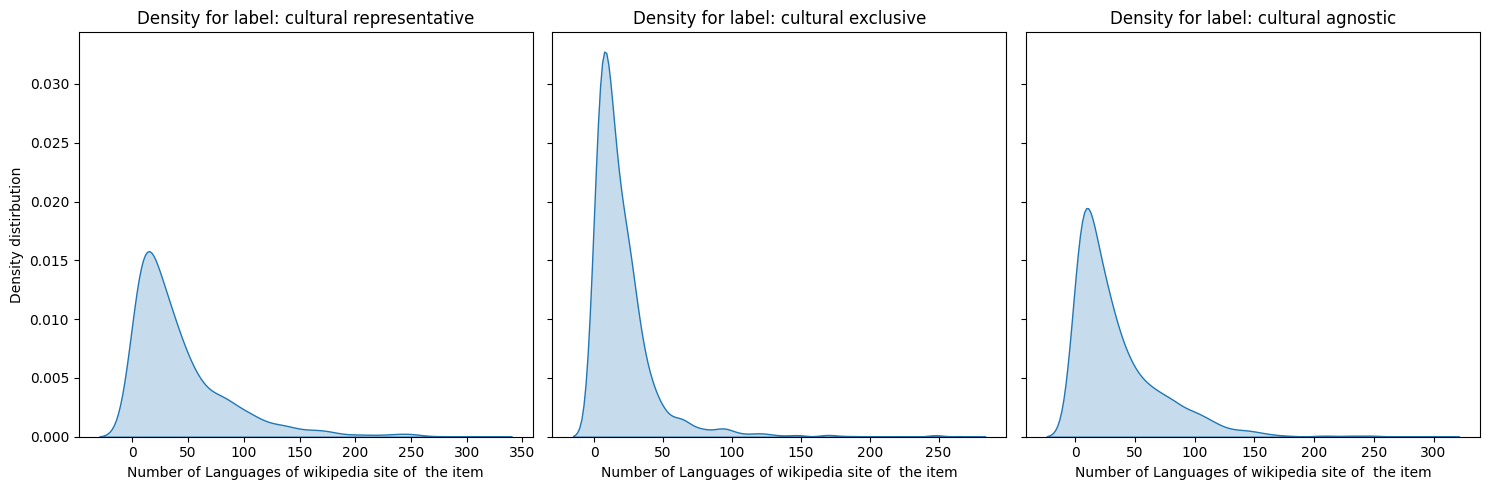

In [22]:
# plotting of the languages
import seaborn as sns
df_lang['nb_lang'] = pd.to_numeric(df_lang['nb_lang'], errors='coerce')
#categories = list(set(df_lang['label']))
categories = ['cultural representative','cultural exclusive', 'cultural agnostic']
print(categories)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)


for i, label in enumerate(categories):
    ax = axes[i]
    subset = df_lang[df_lang['label'] == label]
    sns.kdeplot(data=subset, x='nb_lang', fill=True, ax=ax)
    ax.set_title(f'Density for label: {label}')
    ax.set_xlabel('Number of Languages of wikipedia site of  the item')
    ax.set_ylabel('Density distirbution')

plt.tight_layout()
plt.show()

fig.savefig('density_of_languages_by_label_v2.png')

Index(['cultural exclusive', 'cultural agnostic', 'cultural representative'], dtype='object', name='label')


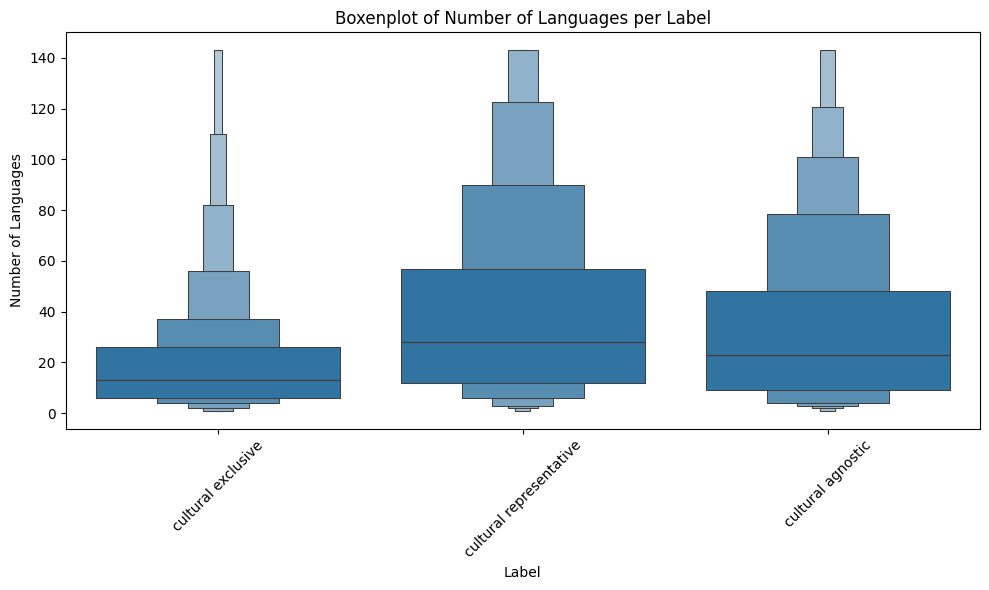

In [23]:
# plotting the mean and the median of the both
import numpy as np
df_lang_dropped = df_lang.dropna(subset=['nb_lang'])


# Get the top n labels
top_labels = df_lang_dropped['label'].value_counts().nlargest(3).index

# Filter the DataFrame to include only the top n labels
df_lang_dropped = df_lang_dropped[df_lang_dropped['label'].isin(top_labels)]
print(top_labels)

low, high = np.percentile(df_lang_dropped['nb_lang'], [2, 98])
df_lang_dropped['nb_lang_clipped'] = df_lang_dropped['nb_lang'].clip(lower=low, upper=high)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_lang_dropped, x='label', y='nb_lang_clipped')
plt.title('Boxenplot of Number of Languages per Label')
plt.xlabel('Label')
plt.ylabel('Number of Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig.savefig('boxplot_of_languages_by_label.png')

In [24]:
from google.colab import files
df_lang.to_csv('train_df_lang.csv', encoding = 'utf-8-sig')
files.download('train_df_lang.csv')
files.download('density_of_languages_by_label.png')
files.download('density_of_languages_by_label_v2.png')
files.download('boxplot_of_languages_by_label.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>